# **Comparación de Modelos de Clasificación con MNIST**

In [ ]:
semilla = 28314688

### **Disclaimer: Se recomienda ejecutar los codigos en orden en ue van aparareciendo para evitar posibles errores de librerias o variables que se declaran antes**

## **Metodologias**

### **Objetivo**

#### El objetivo de esta parte es entender y comparar como funciona el dataset de MNIST, como preprocesamos esos datos para ser usados en los modelos, ver y comparar los resultados que obtenemos para tomar una desicion

### **Preprocesamiento de los Datos**

#### **Carga de datos**

##### Se utiliza el dataset **MNIST**, un conjunto de datos ampliamente empleado en tareas de clasificación de imágenes. Contiene 70,000 imágenes en escala de grises de dígitos escritos a mano (del 0 al 9), cada una de tamaño **28x28 píxeles** con fondo negro y los trazos en blanco, es decir, una escala de grises. Este conjunto de datos es ideal para evaluar algoritmos de clasificación supervisada en visión por computadora. Mostramos un pequeño codigo donde cargamos este dataset y vemos un ejemplo de como es su contenido:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


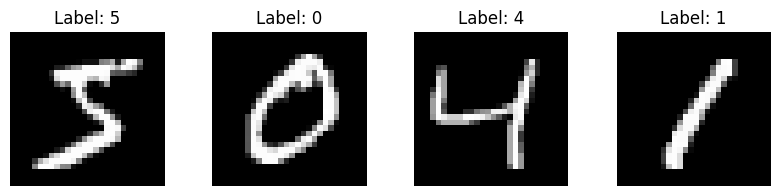

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig, axes = plt.subplots(1, 4, figsize=(10, 2))

# Mostramos 4 imagenes de los datos de prueba
for i in range(4):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')

plt.show()

#### **División de los datos**

##### Ademas tambien cabe  acotar que en el preprocesamiento de los datos se incluye la forma en que vamos a dividirlos antes de empezar a crear nuestros modelos y evaluarlos, debido a la gran cantidad de datos que tiene **MNIST** este ya los trae divididos en entrenamiento y prueba en un porcentaje fijo, entonces como vimos anteriormente solo tuvimos que cargarlos en unas variables

In [ ]:
print(f"- Número de imágenes de entrenamiento: {train_images.shape[0]}")
print(f"- Número de imágenes de prueba: {test_images.shape[0]}")

- Número de imágenes de entrenamiento: 60000
- Número de imágenes de prueba: 10000


##### Como vemos **MINIST** separa en una cantidad de 60000 imagenes para usar en el entrenamiento y 10000 para usar en la prueba, una cantidad bastante alta para probar la fiabilidad de los modelos

#### **Transformaciones**


##### Para mejorar el rendimiento de los modelos, aplicamos las siguientes transformaciones:
##### - **Normalización (Escalado de valores entre 0 y 1):** Es crucial a la hora de utilizar estos datos en cualquier modelo basado en optimización numérica, como la Regresión Logística y SVM, ya que ayuda al modelo a converger más rápidamente y de manera más estable durante el entrenamiento. Además, evita que características con valores grandes dominen este proceso. En el caso de KNN, ayuda a calcular distancias más precisas, ya que los valores de los píxeles estarán en un mismo rango y no afectarán desproporcionadamente la métrica de distancia.
##### - **Conversión en vectores (Imágenes 28x28 a vector de 784 características):** Un paso importante para entrenar nuestros modelos de Regresión Logística y SVM, ya que esperan que cada instancia de datos sea un vector de características en un espacio multidimensional, no una matriz, como es el caso de las imágenes en el dataset. KNN también trabaja mejor cuando los datos están en un formato vectorizado, ya que la métrica de distancia se calcula entre puntos en un espacio dimensional uniforme.
##### La utilización de estos métodos de transformaciones será crucial para entrenar nuestros modelos de la mejor manera posible. Con este pequeño código hacemos esas transformaciones anteriormente explicadas:


In [ ]:
#Conversion a vectores de 784 caracteristicas
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

#Normalizacion de los valores al rango [0,1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### **Modelos**

#### **Regresión logística**

##### En este modelo tomamos la regresión logística el cual es de clasificación originalmente diseñado para problemas binarios, es decir, donde hay solo dos clases, es decir o es 0 o es 1. Sin embargo, en nuestro caso, trabajamos con el dataset **MNIST**, donde queremos clasificar como ya vimos imágenes de dígitos manuscritos en 10 categorías diferentes (números del 0 al 9). Como la regresión logística solo maneja dos clases a la vez, el modelo se ajustará automáticamente para que pueda clasificar múltiples clases. Para lograr esto, se usa enfoque llamado One-vs-Rest (OvR).

##### El método One-vs-Rest permite extender la regresión logística binaria a problemas con múltiples clases, donde para cada una de las 10 clases posibles (0 al 9), entrenamos un modelo de regresión logística binario independiente, es decir, cada modelo se entrena para distinguir una clase específica contra todas las demás (de ahí el nombre One-vs-Rest). Entonces a la hora de hacer una predicción, cada modelo devuelve una probabilidad de que la imagen pertenezca a su clase correspondiente, resultando que la clase final predicha será aquella cuyo modelo asigne la mayor probabilidad. De esta manera importamos el modelo:

In [ ]:
from sklearn.linear_model import LogisticRegression

#### **K-Vecinos**

##### Ahora vamos a hablar del modelo K Vecinos más Cercanos, o KNN. Este modelo es súper intuitivo y se usa mucho para problemas de clasificación, como el que tenemos con el dataset MNIST, donde queremos identificar dígitos escritos a mano del 0 al 9.

##### La idea detrás de KNN es bastante sencilla: Tenemos un montón de imágenes de dígitos ya clasificadas qeu sera nuestro conjunto de entrenamiento. Cuando llega una imagen nueva que no conoces, el modelo busca las k imágenes más parecidas (los "vecinos más cercanos") que ya tienes guardadas.Esto lo saca usando ciertas medidas e hiperparametros.

##### Una vez que tiene a esos k vecinos más cercanos, el modelo hace una votación: la clase que más se repite entre esos vecinos es la que se asigna a la nueva imagen. Por ejemplo, si estás usando k=5 y 3 de los vecinos son un "3" y 2 son un "8", el modelo dirá que la imagen es un "3". Así de simple. De esta manera importamos el modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **SVM**

##### Ahora hablemos del SVM, o Máquinas de Vectores de Soporte, que es otro modelo super interesante para clasificación. En nuestro caso, lo usaremos como ya hemos visto para el dataset MNIST. A diferencia de KNN, que es más intuitivo y sencillo, el SVM es un poco más matemático, pero su idea central es muy parecida.

##### Este modelo tambien es originalmente un método de clasificación binaria, pero al igual que la regresión logística, puede extenderse para manejar problemas multiclase. En este caso, SVC utiliza un enfoque similar al One-vs-Rest (OvR) o One-vs-One (OvO) para adaptarse a la clasificación multiclase. En el enfoque OvR, se entrenan 10 clasificadores binarios independientes, uno por cada clase, donde cada uno aprende a distinguir una clase específica frente a todas las demás. Por otro lado, en el enfoque OvO, se entrenan clasificadores para cada par de clases, lo que resulta en un mayor número de modelos pero puede ser más preciso en ciertos casos. Al realizar una predicción, SVC asigna la clase basándose en la decisión de los clasificadores binarios, seleccionando la clase con mayor confianza o votación.

##### Este enfoque permite que SVC, aunque diseñado para problemas binarios, sea efectivo en tareas multiclase. Lo importamos de la siguiente manera

In [ ]:
from sklearn.svm import SVC

### **Tipos de regularización e hiperparámetros**

##### Cada modelo de clasificación tiene hiperparámetros clave que afectan su rendimiento y capacidad de generalización. Ajustarlos correctamente es esencial para evitar el sobreajuste y mejorar la precisión del modelo. A continuación, exploramos los hiperparámetros más importantes en cada modelo:



#### **Regresion Logistica**

##### **Tipos de regularización**

###### **L1 (Lasso):**

*   Aplica una penalización absoluta a los coeficientes.
*   Tiende a reducir algunos coeficientes exactamente a cero, lo que actúa como un método de selección de características.
*   Útil cuando creemos que algunas variables no aportan mucho y queremos simplificar el modelo.

###### **L2 (Ridge):**

*   Aplica una penalización cuadrática a los coeficientes.
*   No elimina completamente las características, sino que reduce sus valores.
*   Es útil cuando todas las características son importantes, pero queremos evitar valores extremos en los coeficientes.

##### **Control de Regularización**

###### En los dos tipos tenemos un hiperparámetro que denotamos como C el cual es un factor de regularización que controla cuánto permite el modelo ajustarse a los datos.

*  **C grande (poca regularización)** → Permite que el modelo se ajuste más a los datos, lo que puede llevar al sobreajuste (memoriza demasiado los datos de entrenamiento y no generaliza bien a nuevos datos).
*  **C pequeño (más regularización)** → Aumenta la penalización de los coeficientes, reduciendo el sobreajuste pero aumentando el sesgo (puede no capturar toda la complejidad de los datos).



#### **K vecinos**

##### Aunque K Vecinos no tiene una regularizacion explicita como es el caso de la regresion logistica, tiene unos valores que podemos denotar como hiperparametros que son importantes ver para llegar a ajustar de forma correcta nuestro modelo. Repasando estos y como afectaran tenemos lo siguiente:

*   **El Número de Vecinos (k)**: define cuántos vecinos se considerarán al clasicar o predecir el valor de un nuevo punto de datos. Si es demasiado pequeño, el modelo puede volverse susceptible al ruido en los datos. Esto signica que un solo punto de datos atípico puede inuir demasiado en la clasicación, lo que puede llevar a un sobreajuste. Si es demasiado grande, el
modelo puede volverse demasiado general. Esto signica que estará promediando sobre un gran número de vecinos, lo que puede llevar a un subajuste. Por lo que encontrar un balance es la clave.

*   **Métricas de distancia:** Esta determina cómo se calcula la “cercanía”
entre los puntos de datos. Esta cercanía es lo que guía la clasicación o regresión en KNN, ya que el algoritmo selecciona los K puntos más cercanos para realizar predicciones. La **Euclidiana** es la distancia “recta” entre dos puntos, funciona bien cuando las características tienen una escala similar, pero puede ser problemático si las características tienen rangos muy diferentes. La **Manhattan** mide la distancia entre dos puntos a lo largo de los ejes del espacio, funciona bien en espacios de alta dimensión donde las características no están correlacionadas.

*   **Ponderación de los Vecinos (weights):** El parámetro weights define cómo se consideran los vecinos en la votación de la clase. La **Uniforme** especifica que todos los vecinos tienen el mismo peso, mientras que en la ponderación **basados en la distancia** los vecinos más cercanos reciben un
peso más alto.



#### **SVM**

##### Dentro de los parametros, hiperparametros y tipos de regularizacion del SVM tenemos:


*   **C (Coeficiente de Regularización):** Controla el compromiso entre maximizar el margen y minimizar la clasificación errónea. Un valor pequeño para C permite un margen más amplio a expensas de algunos errores de clasificación. Un valor alto para C exige una clasificación correcta, posiblemente a expensas de un margen más estrecho.

*   **Kernel (Función de transformación del espacio de características):** Dentro del kernel tenemos lo siguientes tipos:

    1.  **Lineal:** Separa los datos con una línea recta. Funciona bien si los datos son linealmente separables.
    1.  **Polinomial:** Transforma los datos en un espacio de mayor dimensión con términos polinómicos.
    2.  **RBF (Radial Basis Function o Gaussiano):** Es el más usado para datos no linealmente separables. Mapea los datos a un espacio de mayor dimensión donde son separables.

*   **Gamma:** Solo se usa para el kernel RBF y otros. Define cuán lejos llega la influencia de un solo ejemplo de entrenamiento. Valores bajos significan influencia lejana y valores altos significan influencia cercana.



## **Construcción y Evaluación**

### Una vez repasados en las metodologías todos los puntos clave que vamos a usar para nuestros modelos, podemos empezar a construirlos e ir evaluando su rendimiento mediante distintas métricas, gráficos y demás. Vamos a ir construyendo y evaluando cada uno, ajustando los hiperparámetros y todas las cosas que veamos necesarias para tener un rendimiento deseado en este conjunto de datos.

### **Regresión logística**

#### En esta parte, comenzaremos con el modelo de regresión logística. Lo entrenaremos con el conjunto de entrenamiento y haremos predicciones con el conjunto de prueba. Además, mostraremos las metricas del modelo y haremos una pequeña gráfica para ver cómo se está comportando. Colocamos todo el codigo que usaremos para que este en un solo lugar y se pueda entrenar directamente desde aqui:

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos

# Conversion a vectores de 784 caracteristicas
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Normalizacion de los valores al rango [0,1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Entrenamos al modelo con todo el conjunto de entrenamiento
model = LogisticRegression(max_iter=1000, random_state=semilla)
model.fit(train_images, train_labels)

# Precisiones

train_predictions = model.predict(train_images)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Precisión del modelo en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_lr = model.predict(test_images)
accuracy = accuracy_score(test_labels, predictions_lr)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 93.89%
Precisión del modelo en el conjunto de prueba: 92.55%


#### Podemos observar que la precisión del modelo en el conjunto de entrenamiento es del 93,89%, mientras que en el conjunto de prueba es del 92,55%. Que no haya mucha variacion entre estas presiciones nos indica que no existe un sobreajuste en el modelo, algo que estábamos buscando y, además, demuestra un buen desempeño general en la clasificación de dígitos no vistos del MNIST. Sin embargo, enfocándonos en el conjunto de prueba, este valor por sí solo no nos informa sobre la distribución de los errores, es decir, qué clases están siendo clasificadas correctamente y cuáles están generando confusión. Por lo tanto, podemos realizar otras evaluaciones y métricas para visualizar mejor esta precisión.

#### Con esta matriz de confusión podemos analizar el rendimiento del modelo en cada clase y observar qué tipos de errores obtiene. En la diagonal principal se encuentran las predicciones correctas (donde la etiqueta real y la predicción coinciden). Fuera de la diagonal están los errores, indicando qué clases se confunden entre sí.

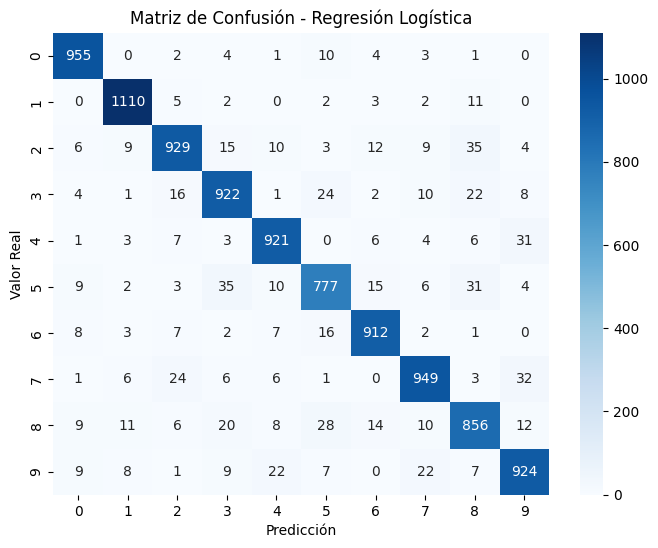

In [ ]:
from sklearn.metrics import confusion_matrix
# Matriz de confusion
conf_matrix = confusion_matrix(test_labels, predictions_lr)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

#### De la matriz podemos concluir distintas cosas:

*   La mayoría de los valores están en la diagonal principal, lo que indica que el modelo tiene un buen desempeño.

*  Algunas clases tienen valores más altos en la diagonal, lo que significa que son más fáciles de clasificar correctamente.

*  La clase 5 muestra más errores, con 35 ejemplos clasificados erróneamente como 3 y 31 como 8. Esto nos indica que el modelo confunde estos dígitos con frecuencia.

*   La clase 8 también tiene cierta confusión, con 28 casos mal clasificados como 5 y 14 como 4.

*   La clase 9 tiene algunos errores con 7 y 4, lo que indica como pasa con el 5 y el 8 que estos números tienen similitudes en sus características.

*   Las clases 1, 7 y 0 tienen una gran cantidad de predicciones correctas con muy pocos errores, lo que indica que estas clases tienen características bien diferenciadas.

#### Ahora vamos a hacer un reporte de clasificación para ver cómo está funcionando el modelo



In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions_lr, output_dict=True)
print("\nReporte de Clasificación:\n", classification_report(test_labels, predictions_lr))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#### Viendo el reporte de clasificación, podemos notar varias cosas interesantes:
*   La precisión global es del 93%, lo cual es bastante bueno considerando la cantidad de datos con los que estamos trabajando. Además, el **macro avg** y el **weighted avg** están en 92%-93%, lo que indica que el modelo no está favoreciendo solo a algunas clases, sino que está funcionando de manera equilibrada en general.

*   Los mejores resultados los tiene el dígito 1 (97% de F1-score) y el 0 (96%), lo que nos dice que el modelo tiene muy poca dificultad para reconocerlos. En cambio, el 8 (88%) y el 5 (89%) son los que más problemas presentan. Esto tiene sentido porque el 8 puede confundirse con un 3 o un 0, y el 5 a veces se parece al 3 dependiendo de cómo esté escrito.

*   El modelo tiene más errores cuando predice un 8 (precisión más baja), lo que significa que a veces asigna un 8 cuando en realidad es otro número.

#### De esta grafico de barras podemos ver de una forma mas grafica la precisión de cada clase, dando el promedio de estas en la precisión que vimos mas arriba en el conjunto de prueba

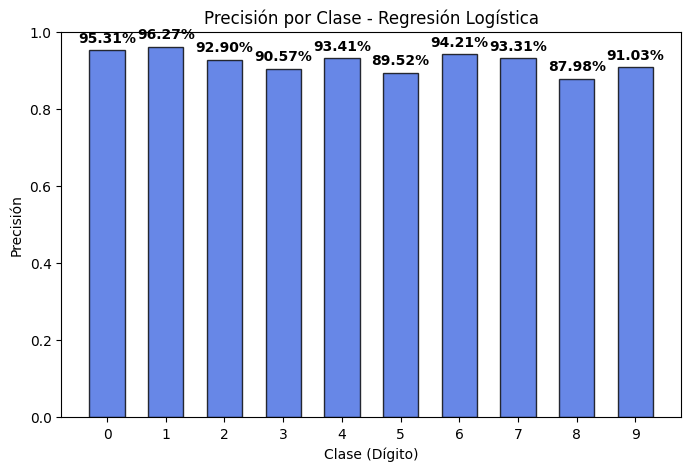

In [ ]:
class_labels = list(report.keys())[:-3]
precision_values = [report[label]["precision"] for label in class_labels]

# Convertir etiquetas de clase a enteros
class_labels = [int(label) for label in class_labels]

plt.figure(figsize=(8, 5))
plt.bar(class_labels, precision_values, color='royalblue', alpha=0.8, edgecolor='black', width=0.6)

# Etiquetas
plt.xlabel("Clase (Dígito)")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.title("Precisión por Clase - Regresión Logística")

# Valores en las barras
for i, v in enumerate(precision_values):
    plt.text(class_labels[i], v + 0.02, f"{v * 100:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Grafico
plt.xticks(class_labels)
plt.show()


#### Podemos ver aqui las curvas roc para cada una de las clases,

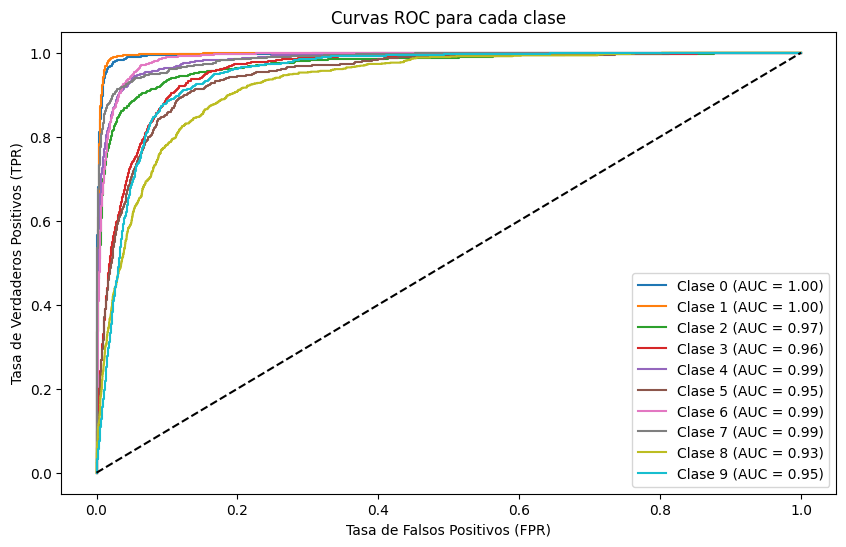

Área bajo la curva ROC (AUC) promedio: 0.9698


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Convertir etiquetas a formato one-hot (binarizado)
test_labels_bin = label_binarize(test_labels, classes=np.arange(10))

y_score = model.decision_function(test_images)

# Diccionarios para almacenar FPR, TPR y AUC
fpr, tpr, roc_auc = {}, {}, {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la Curva ROC
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Linea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC para cada clase")
plt.legend(loc="lower right")
plt.show()

# Calcular AUC promedio
macro_roc_auc = roc_auc_score(test_labels_bin, y_score, multi_class="ovr", average="macro")
print(f"Área bajo la curva ROC (AUC) promedio: {macro_roc_auc:.4f}")


####Lo primero que podemos ver es cómo las curvas tienen un comportamiento deseado, es decir, su desempeño al clasificar está bastante bien para todas las clases. Si lo comparamos con las curvas vistas en clase (en la imagen de abajo), vemos que su comportamiento se asemeja bastante a la curva de lo que buscamos y el "OK!", por lo que tenemos un buen modelo. Algunas de las cosas que podemos notar son:


*   Las clases 0 y 1 tienen un AUC = 1.00, esto quiere decir que el modelo identifica perfectamente estas clases, sin falsos positivos ni falsos negativos. Esto puede ser porque son clases con patrones muy diferenciados.

*   Las clases 4, 6 y 7 tienen un AUC ≈ 0.99, es decir, tienen un rendimiento excelente, con muy pocas confusiones con otras clases. El modelo distingue bien estas clases, pero no es completamente perfecto.

*   Las clases 2, 3, 5, 9 oscilan con un AUC entre 0.95 y 0.97, siguen siendo muy buenas, pero hay algunas confusiones con otras clases.

*   La Clase 8 tiene un AUC = 0.93, vemos que es la que tiene el peor desempeño relativo con las demas, pero sigue siendo muy buen valorPosiblemente el modelo la confunda con otros dígitos visualmente parecidos. Posiblemente el modelo la confunda con otros dígitos visualmente parecidos.

#### Tambien podemos ver que el AUC promedio da 0.9698, lo cual nos dice que el modelo está funcionando bastante bien en términos de clasificación. Como el valor está muy cerca de 1.0, significa que el modelo distingue correctamente entre las diferentes clases la mayoría de las veces. Es decir, cuando tiene que decidir entre una clase u otra, casi siempre lo hace bien. Sin embargo, si miramos las curvas ROC de cada clase, hay algunas que tienen un AUC un poco más bajo (como la clase 8), lo que sugiere que el modelo puede confundirse más en ciertos casos.

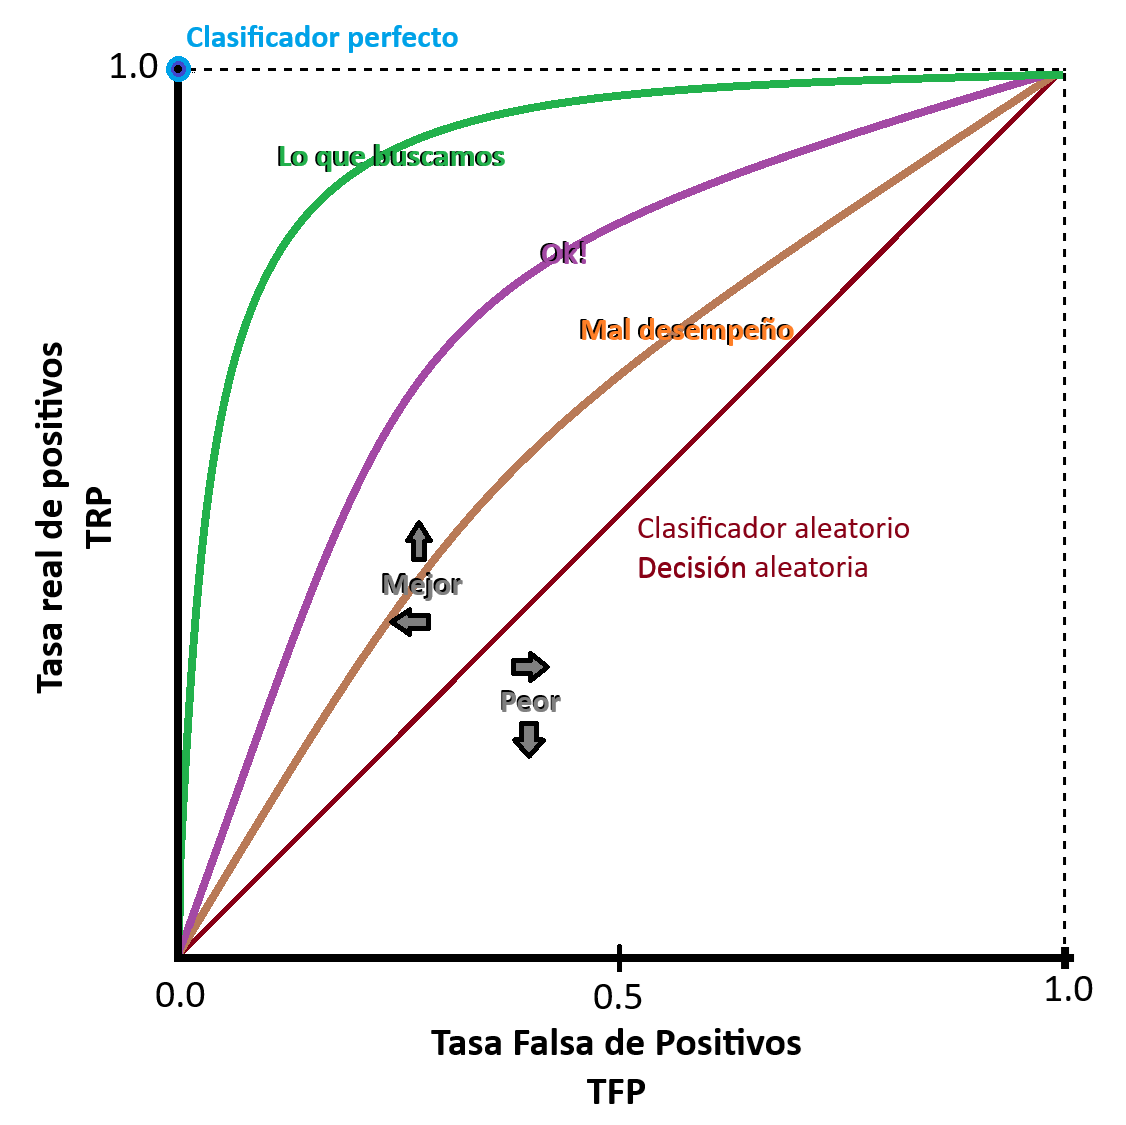

In [ ]:
from sklearn.metrics import log_loss

probabilities = model.predict_proba(test_images)
loss = log_loss(test_labels, probabilities)
print(f"Pérdida logarítmica: {loss:.4f}")

Pérdida logarítmica: 0.2719


#### Con ese valor podemos concluir que la pérdida logarítmica de 0.2719 nos dice qué tan seguro está el modelo al hacer sus predicciones. Una pérdida logarítmica más baja es mejor, porque significa que el modelo no solo acierta, sino que también lo hace con seguridad. En este caso, aunque el valor no es malo, sí nos indica que el modelo todavía tiene algo de duda en algunas predicciones. Esto puede pasar si hay clases que se parecen mucho entre sí o si algunos datos son un poco ruidosos.

#### Con el modelo ya entrenado y evaluado, podemos probar algunos ejemplos de salida de predicciones en formato de imagen

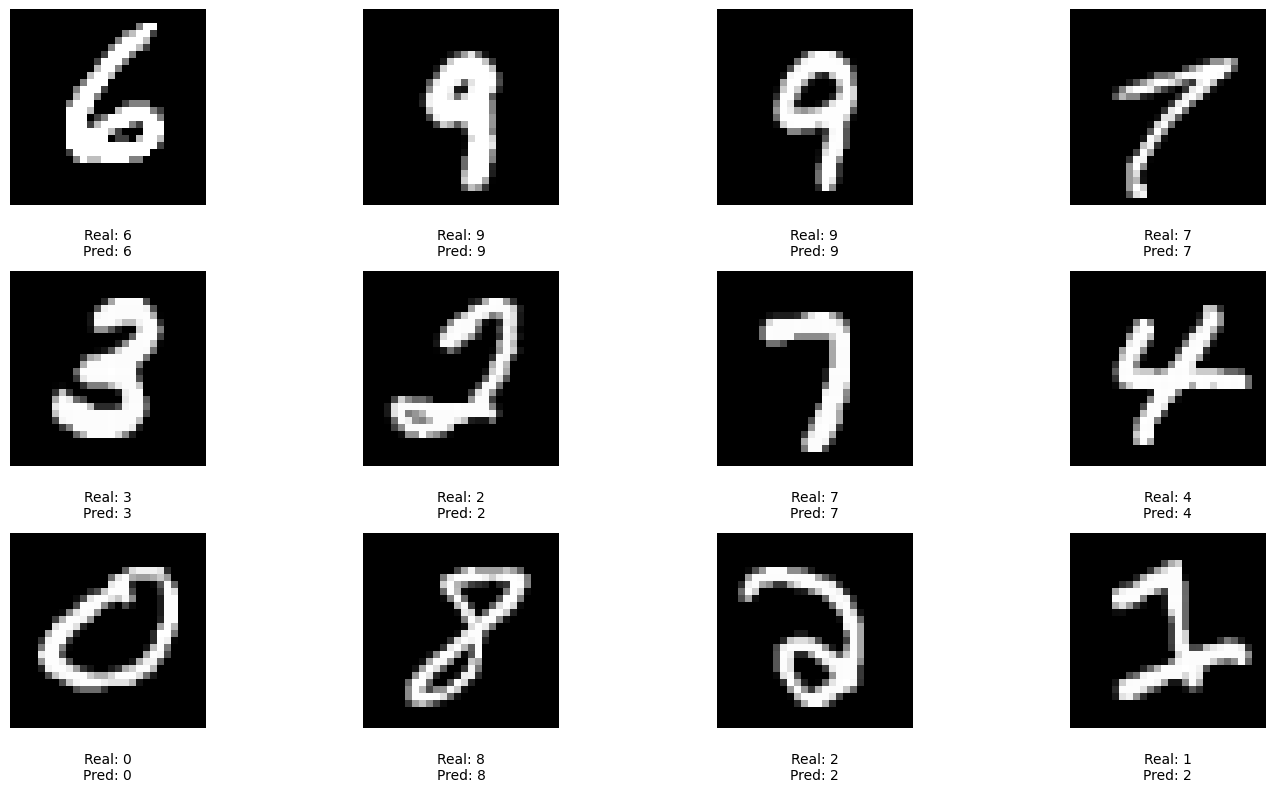

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 12
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_lr[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

#### Tambien mostramos algunas predicciones incorrectas para ver como confunde algunos numeros:

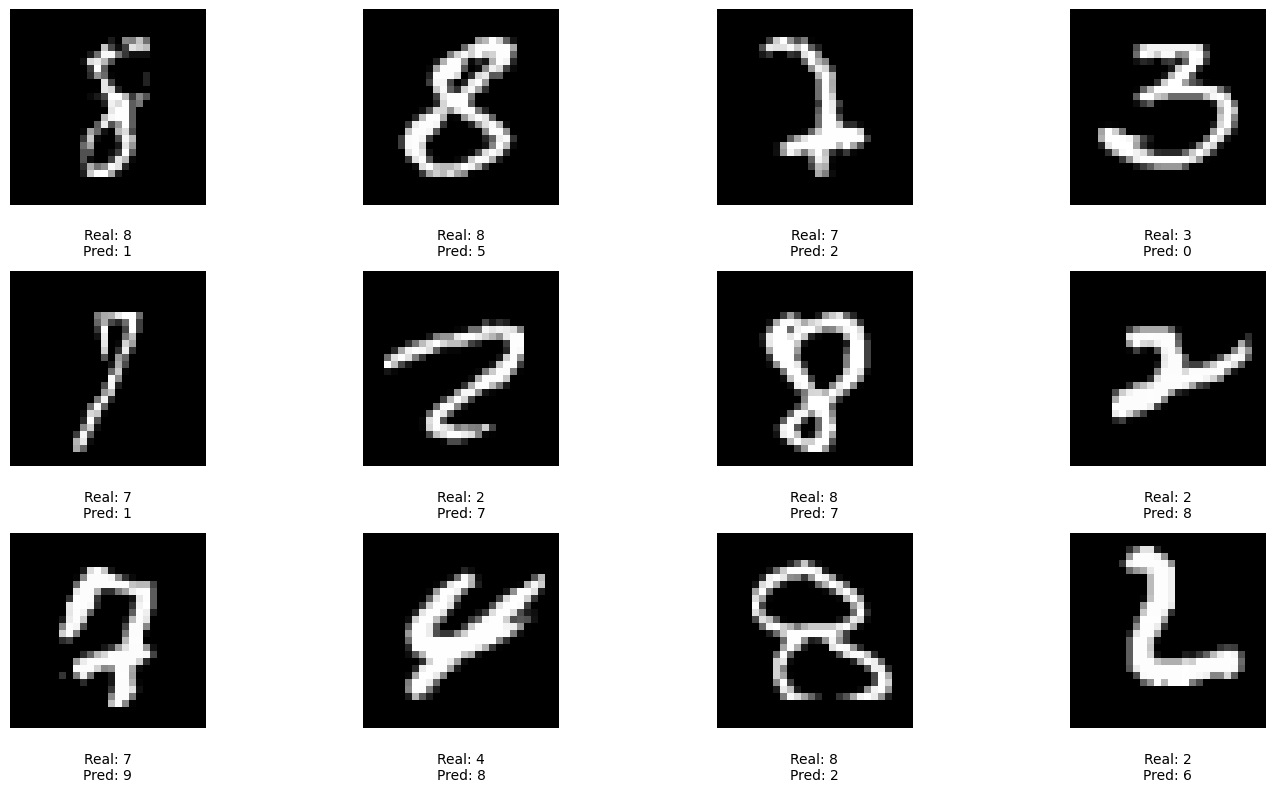

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

incorrect_indices = np.where(test_labels != predictions_lr)[0]
num_samples = 12
sample_indices = np.random.choice(incorrect_indices, min(num_samples, len(incorrect_indices)), replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_lr[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

#### ¿Porque se decidio en este caso no modificar los hiperparametros y poner una mayor regularizacion?

*   La decisión de no usar regularización en el modelo de regresión logística para MNIST se basa en varias razones. Primero, MNIST es un dataset bien comportado. Las clases están balanceadas y no hay mucho ruido. Esto facilita que el modelo aprenda sin dificultad.
*   La regularización es más útil en otros escenarios. Por ejemplo, cuando hay muchas características irrelevantes, ruido en los datos o clases desbalanceadas. En MNIST, estas condiciones no se cumplen de manera significativa.
*   La precisión en el conjunto de entrenamiento (93.89%) y en el conjunto de prueba (92.55%) es muy similar. Esto indica que el modelo está generalizando bien y no está memorizando los datos de entrenamiento, entonces si no hay sobreajuste, no hay necesidad de aplicar técnicas de regularización



### **K-Vecinos**

####En esta parte, comenzaremos con el modelo de K-Vecinos. Lo entrenaremos con el conjunto de entrenamiento y haremos predicciones con el conjunto de prueba. Además, mostraremos las métricas del modelo, haremos gráficas para ver cómo se está comportando y conseguiremos los valores óptimos de sus hiperparámetros. Colocamos todo el código que usaremos para que esté en un solo lugar y se pueda entrenar directamente desde aquí:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos

train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Valores al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Se usa k=5
knn.fit(train_images, train_labels)

# Precisiones

train_predictions = knn.predict(train_images)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Precisión del modelo en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_knn = knn.predict(test_images)
accuracy = accuracy_score(test_labels, predictions_knn)
print(f"Precisión del modelo KNN en el conjunto de prueba: {accuracy * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### En esta primera prueba se usa k=5, ya que es el estándar del modelo KNN, dando como resultado una precisión del 98,19% para el conjunto de entrenamiento y del 96,88% para el conjunto de prueba. Esto nos indica que, además de no haber sobreajuste debido a la poca diferencia entre las precisiones, tenemos un muy buen rendimiento ante los datos de prueba. Sin embargo, en este caso, queremos encontrar el mejor valor de k para este modelo y dataset, con el fin de obtener la máxima precisión, aunque el cambio pueda ser mínimo.

#### Con el siguiente código en donde usamos validacion cruzada en k-folds con con k=3, conseguimos el mejor valor de k para este dataset en este modelo. Es el único hiperparámetro del modelo que vamos a ajustar, ya que, como se ha mencionado varias veces, el dataset de MNIST es bastante robusto y contiene una gran cantidad de datos y variados entre si, suficiente para obtener buenas métricas y una buena generalización a datos nuevos sin necesidad de modificar más hiperparámetros. Ademas como vimos en las presiciones anteriores no encontramos un sobreajuste signfificativo del modelo.

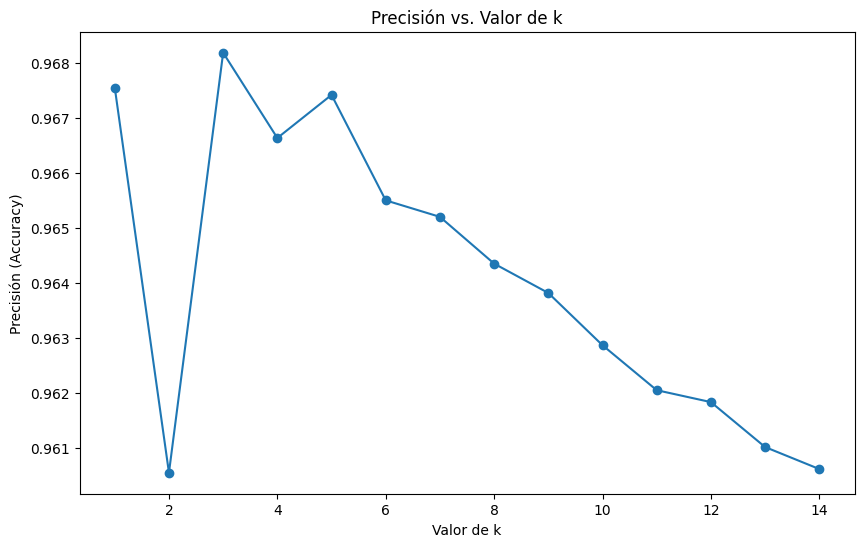

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Se prueban distintos valores de K
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_images, train_labels, cv=3, scoring='accuracy')
    accuracies.append(scores.mean())

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión vs. Valor de k')
plt.show()

#### Como vemos claramente en la gráfica, el mejor k en este caso sería 3, con una precisión por encima del 0.968. Por lo tanto, asignamos ese valor a nuestro modelo y lo entrenamos nuevamente para comenzar a ver las métricas del modelo con ese k óptimo.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos

train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Valores al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Se usa k=3
knn.fit(train_images, train_labels)

# Precisiones

train_predictions = knn.predict(train_images)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Precisión del modelo en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_knn = knn.predict(test_images)
accuracy = accuracy_score(test_labels, predictions_knn)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 98.67%
Precisión del modelo en el conjunto de prueba: 97.05%


#### Como vemos, la precisión en los dos conjuntos aumentó un poco. Aunque el cambio fue mínimo, la búsqueda del mejor k fue relativamente fácil, por lo que era la mejor opción realizar esa búsqueda y cambiar el valor.

#### Vamos ahora a mostrar unas métricas que nos van a ayudar a medir qué tan bien está actuando nuestro modelo en ese conjunto de prueba.

#### Con esta matriz de confusión podemos analizar el rendimiento del modelo en cada clase y observar qué tipos de errores obtiene. En la diagonal principal se encuentran las predicciones correctas (donde la etiqueta real y la predicción coinciden). Fuera de la diagonal están los errores, indicando qué clases se confunden entre sí.

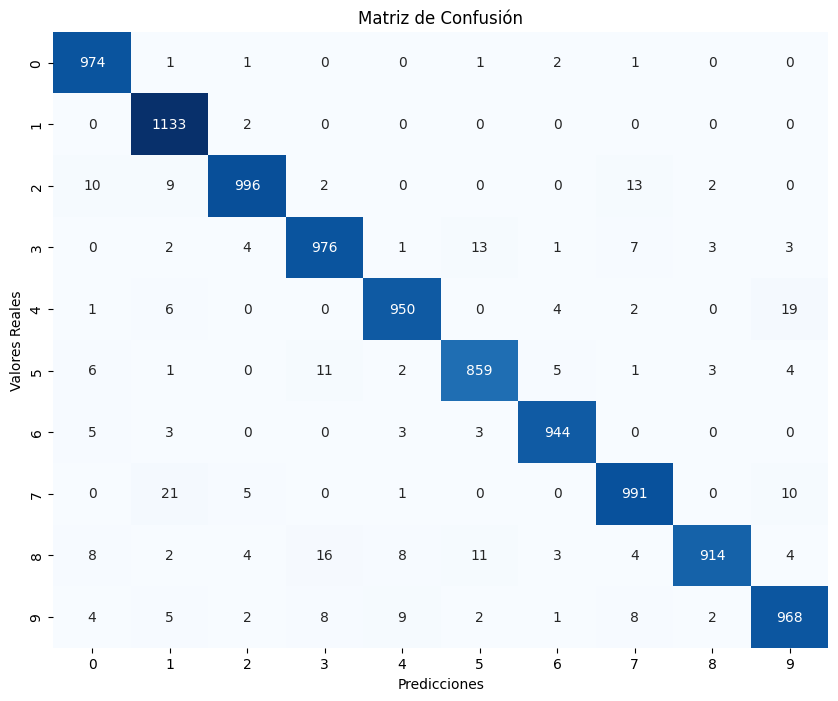

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(test_labels, predictions_knn)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

#### La matriz de confusión nos ayuda a ver qué tan bien está funcionando el modelo KNN para cada clase. En este caso, vemos que la mayoría de los valores se encuentran en la diagonal principal, lo que significa que el modelo está clasificando correctamente la mayoría de los ejemplos.

#### Sin embargo, hay algunos errores que vale la pena mencionar. Por ejemplo, la clase 5 tiene algunas confusiones con la clase 3 y la clase 8, lo que indica que el modelo a veces se equivoca entre estos números. Algo similar ocurre con la clase 9, que ocasionalmente es confundida con la clase 4 o la clase 8. Esto puede deberse a similitudes en la forma de los números escritos a mano, lo cual es común en este tipo de problemas.

####En general, la matriz de confusión nos muestra que el modelo está funcionando muy bien, con muy pocos errores de clasificación.

#### Hacemos un reporte de clasificación para ver cómo está funcionando el modelo con las metricas de precisión, F1 score y recall de forma general y por cada clase:


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions_knn, output_dict=True)
print("\nReporte de Clasificación:\n", classification_report(test_labels, predictions_knn))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### Con este reporte de clasificación tenemos más detalles sobre el desempeño del modelo en términos de precisión, recall y f1-score para cada clase.

*   Precisión: En este caso, todas las clases tienen una precisión bastante alta (alrededor de 0.96 a 0.99), lo que significa que el modelo casi siempre acierta cuando dice que una imagen pertenece a una clase en particular.

*   Recall: Aquí también vemos valores altos, lo que indica que el modelo está capturando la mayoría de los ejemplos de cada número sin dejar muchos fuera.

*   F1-score: Es una combinación de precisión y recall, y en este caso, los valores cercanos a 0.97 nos dicen que el modelo tiene un buen balance entre ambos.
#### Finalmente, la precisión global (accuracy) del modelo es del 97%, lo que es un resultado excelente. Esto significa que de cada 100 imágenes, aproximadamente 97 fueron clasificadas correctamente. Viendo estos valores vemos que el modelo esta funcionando muy bien con este dataset

#### En este caso, también tenemos un gráfico de barras sobre la precisión del reporte.

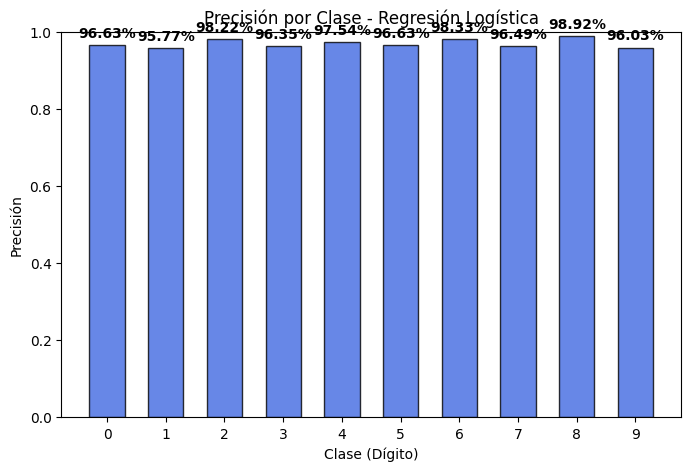

In [ ]:
import matplotlib.pyplot as plt

class_labels = list(report.keys())[:-3]
precision_values = [report[label]["precision"] for label in class_labels]

# Etiquetas a Int
class_labels = [int(label) for label in class_labels]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(class_labels, precision_values, color='royalblue', alpha=0.8, edgecolor='black', width=0.6)

# Etiquetas
plt.xlabel("Clase (Dígito)")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.title("Precisión por Clase - K-Vecinos")

for i, v in enumerate(precision_values):
    plt.text(class_labels[i], v + 0.02, f"{v * 100:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Mostar plot
plt.xticks(class_labels)
plt.show()

#### Tenemos las siguientes curvas ROC

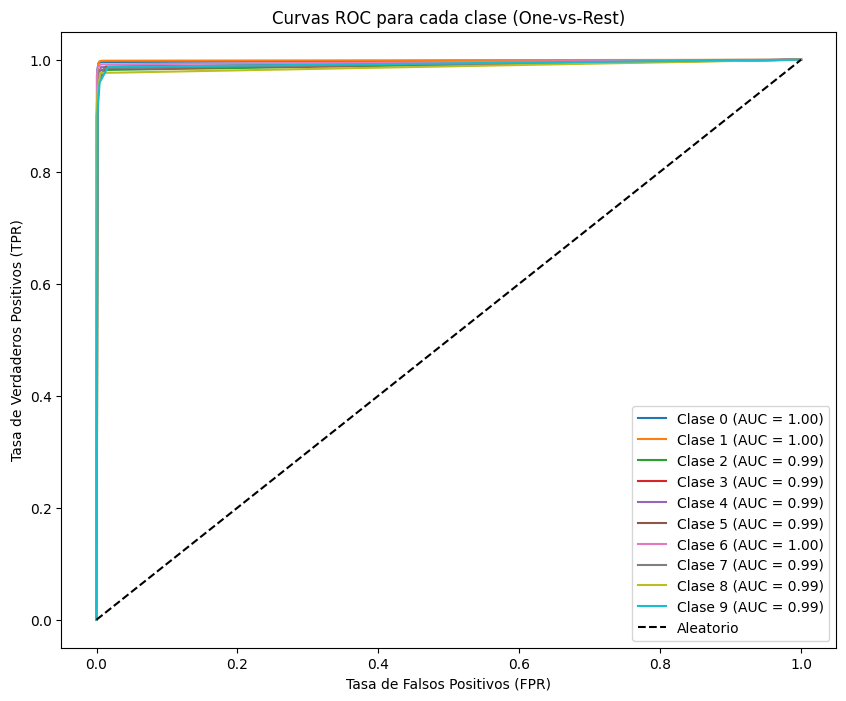

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas
y_test_bin = label_binarize(test_labels, classes=range(10))

y_probs = knn.predict_proba(test_images)

# Curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

#### Esta gráfica muestra las curvas ROC para cada una de las clases del modelo , utilizando el enfoque One-vs-Rest. La curva ROC nos indica qué tan bien el modelo distingue cada clase de las demás, y el área bajo la curva (AUC) nos da una métrica numérica de ese rendimiento.

#### En este caso, las curvas están prácticamente pegadas al eje superior izquierdo, lo que significa que el modelo logra una excelente separación entre las clases. Además, los valores de AUC son extremadamente altos (0.99 o 1.00 para todas las clases), lo que confirma que el modelo tiene una capacidad casi perfecta para distinguir los dígitos entre sí.

#### Si el AUC estuviera cerca de 0.5, significaría que el modelo no es mejor que una clasificación aleatoria (línea punteada en la gráfica). Sin embargo, aquí los valores están muy cercanos a 1, lo que nos dice que el modelo KNN está realizando un trabajo sobresaliente en la clasificación de los dígitos del MNIST.

##### En resumen, este gráfico confirma que el modelo tiene una gran capacidad para identificar correctamente los números escritos a mano, con un nivel de precisión altísimo en la clasificación.

#### Mostramos ahora unas predicciones que hace el modelo

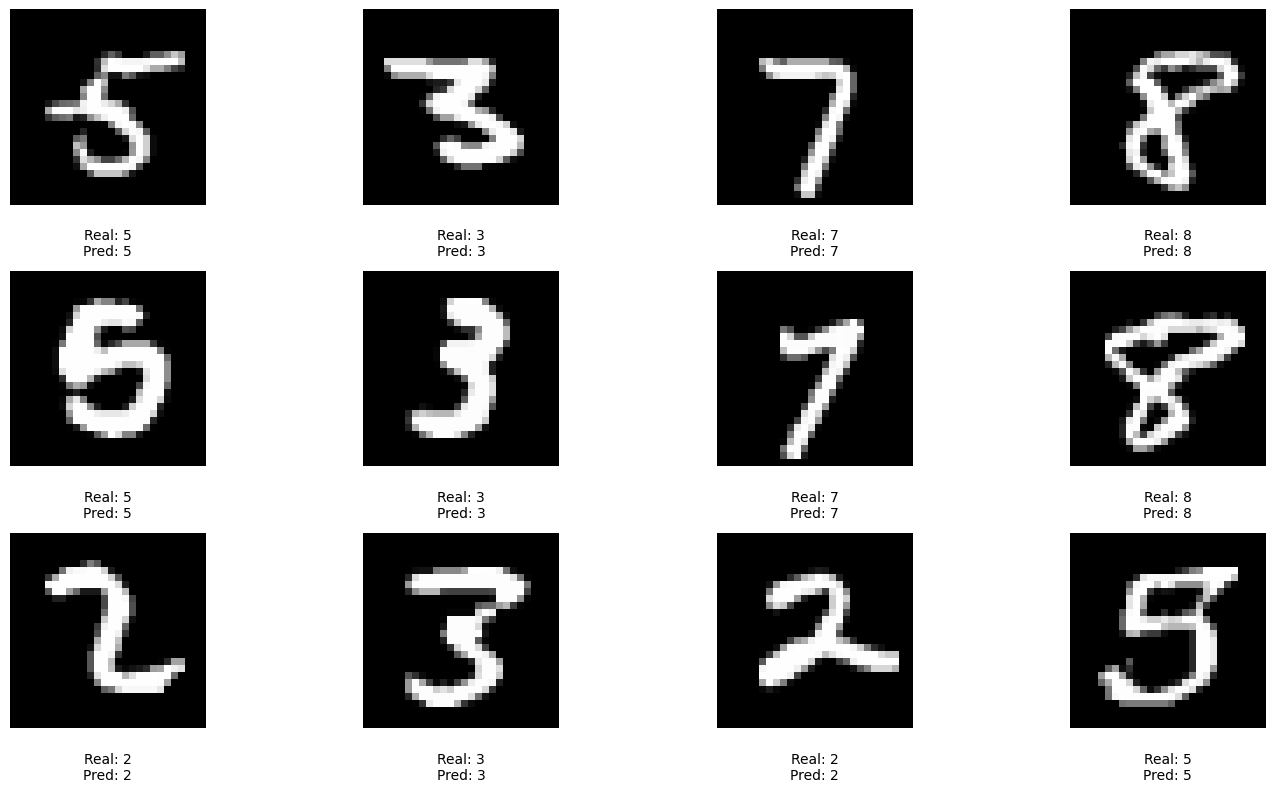

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 12
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_knn[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

#### Algunas predicciones erroneas

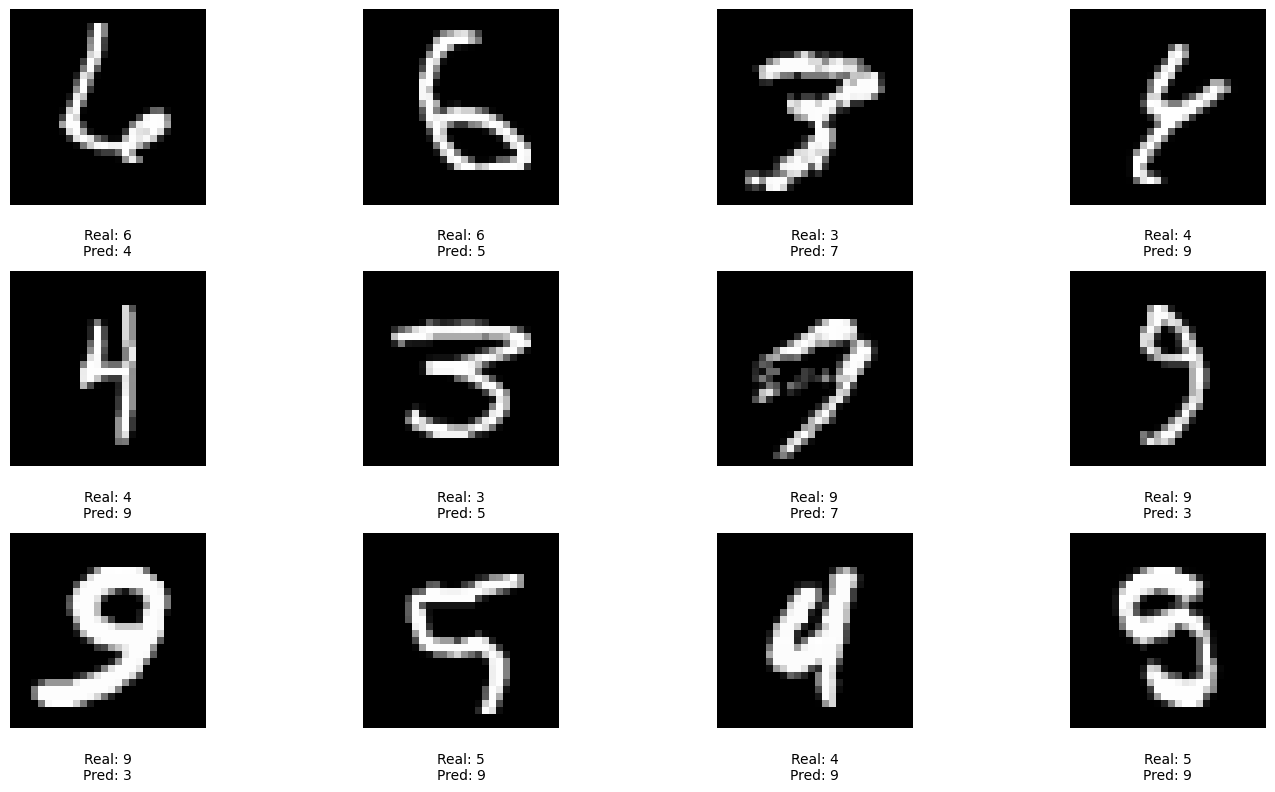

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

incorrect_indices = np.where(test_labels != predictions_knn)[0]
num_samples = 12
sample_indices = np.random.choice(incorrect_indices, min(num_samples, len(incorrect_indices)), replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_knn[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

### **SVM**

#### En esta parte, comenzaremos con el modelo de SVM. Lo entrenaremos con el conjunto de entrenamiento y haremos predicciones con el conjunto de prueba. Además, mostraremos las métricas del modelo, haremos gráficas para ver cómo se está comportando y conseguiremos los valores óptimos de sus hiperparámetros. Colocamos todo el código que usaremos para que esté en un solo lugar y se pueda entrenar directamente desde aquí:


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from keras.datasets import mnist

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos

# Vectores de 784 características
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Valores al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Entrenar el modelo SVM
svm = SVC(kernel='rbf', probability=True, random_state = semilla) # Vamos a usar rbf en este caso y colocamos probability=True para despues poder ver sus curvas ROC
svm.fit(train_images, train_labels)

# Precisiones

train_predictions = svm.predict(train_images)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Precisión del modelo en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_svm = svm.predict(test_images)
accuracy = accuracy_score(test_labels, predictions_svm)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 98.99%
Precisión del modelo en el conjunto de prueba: 97.92%


#### Este modelo, especificamente con kernel RBF se logró una precisión del 98.99% en el conjunto de entrenamiento y 97.92% en el conjunto de prueba, lo que indica que clasifica correctamente la gran mayoría de los datos del MNIST, ademas esta diferencia entre los puntajes nos dicen que no hay un sobreajuste que nos preocupe. El conjunto de prueba tiene una precisión muy alta, lo que significa que el modelo es bastante efectivo para distinguir los diferentes números nuevos. En comparación con otros modelos, SVM suele ser una excelente opción cuando se trabaja con datos de imágenes en alta dimensión.

#### En resumen, el SVM con kernel RBF está funcionando de manera excelente en este problema, logrando casi un 98% de precisión en el conjunto de prueba, lo que lo convierte en una opción sólida para la clasificación de estos datos.

#### En este caso, vamos a dejar la regularización por defecto, la cual es un valor de C de 1.0. Dado que ya contamos con un dataset bastante robusto y con una gran cantidad de datos, y como vimos no hay un sobreajuste, por lo tanto la regularización no tiene un impacto tan fuerte.

#### Vamos a revisar las métricas que hemos utilizado en los otros modelos y ver cómo responde. Además, intentaremos encontrar el kernel que nos brinde los mejores resultados.

#### Con esta matriz de confusión podemos analizar el rendimiento del modelo en cada clase y observar qué tipos de errores obtiene. En la diagonal principal se encuentran las predicciones correctas (donde la etiqueta real y la predicción coinciden). Fuera de la diagonal están los errores, indicando qué clases se confunden entre sí.

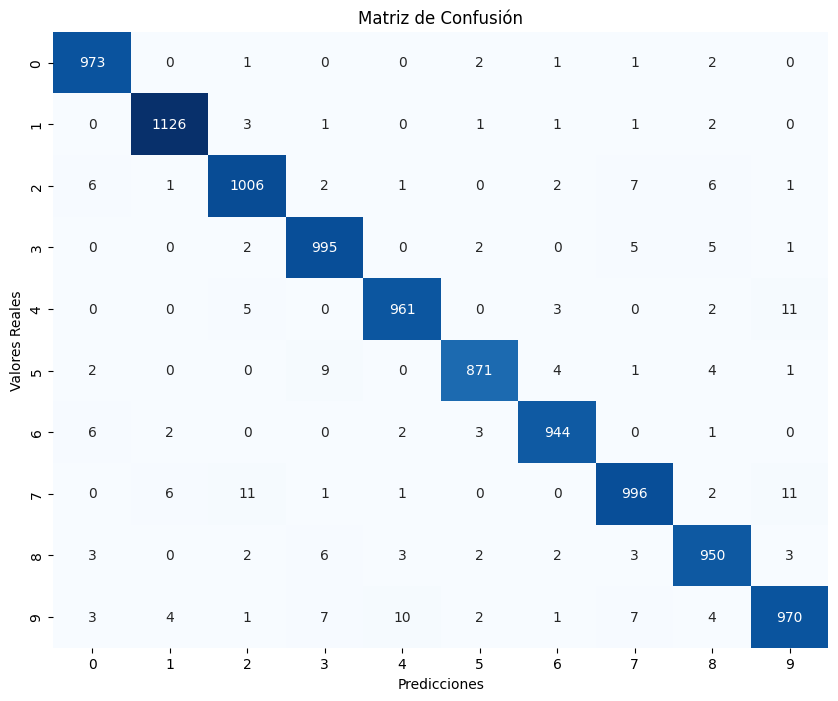

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(test_labels, predictions_svm)

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

#### Como vemos con esta matriz de confusión, fijándonos en la diagonal principal, el modelo realmente no llega a confundir muchas clases, lo que lo hace bastante robusto. Debido a la cantidad de datos de MNIST, podemos decir que también es muy bueno en generalizaciones. Muy pocas veces llega a confundir clases, y donde más podemos ver que se confunde es en las clases 9 y 7. Sin embargo, comparado con los datos en los que acierta, esto es algo mínimo.

#### Hacemos un reporte de clasificación para ver cómo está funcionando el modelo con las metricas de precisión, F1 score y recall de forma general y por cada clase:

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predictions_svm)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Este reporte nos da una idea detallada de cómo ha rendido el modelo SVM en la clasificación de los dígitos del conjunto de datos MNIST.


*   Precisión: Aquí, vemos que la precisión ronda entre 0.97 y 0.99 para todas las clases, lo que significa que cuando el modelo dice que una imagen pertenece a un número específico, en la mayoría de los casos, tiene razón.
*   Recall: En este caso, el recall es muy alto (alrededor de 0.97-0.99), lo que significa que el modelo casi no deja pasar sin identificar los dígitos correctamente.
F1-score: El F1-score también es alto (~0.98), lo que indica que el modelo tiene un equilibrio muy bueno entre precisión y recall.


#### Tenemos las siguientes curvas ROC

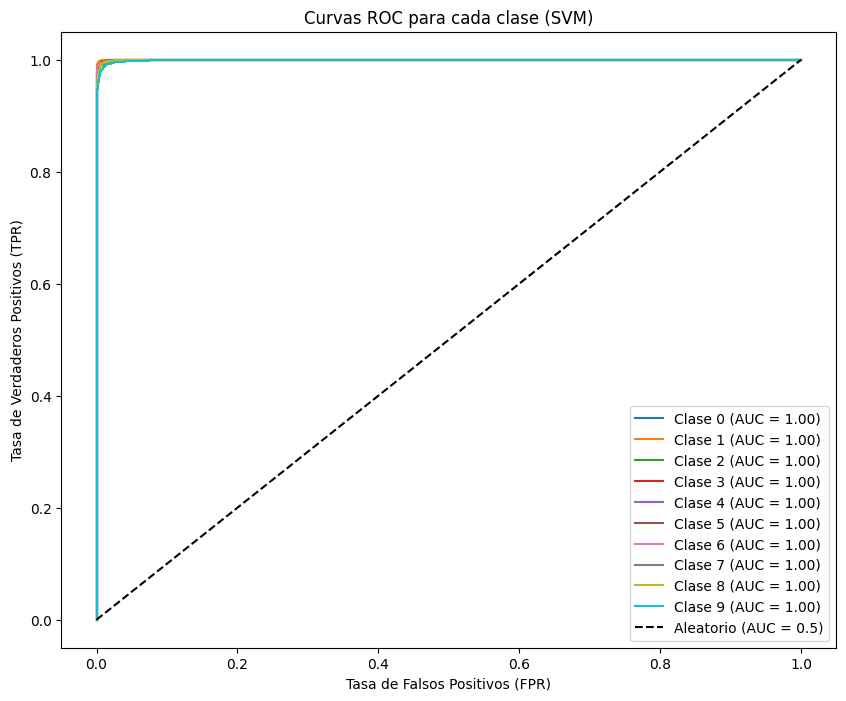

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas para usar el One-vs-Rest
y_test_bin = label_binarize(test_labels, classes=range(10))

y_probs = svm.predict_proba(test_images)  # Probabilidades de cada clase

# Curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase (SVM)')
plt.legend(loc='lower right')
plt.show()

#### En este caso vemos que las curvas son perfectas a lo que buscamos, lo que significa que el modelo logra una excelente separación entre las clases. Además, los valores de AUC son todos de 1.00, lo que nos dice que el modelo tiene una capacidad perfecta para distinguir los dígitos entre sí.

#### Por lo que podemos ver estas curvas ROC y los valores de AUC son practicamente perfectos, dandonos a ver que realmente el modelo tiene muy buenas probabilidades en cada clase

#### Mostramos algunas predicciones hechos por el modelo

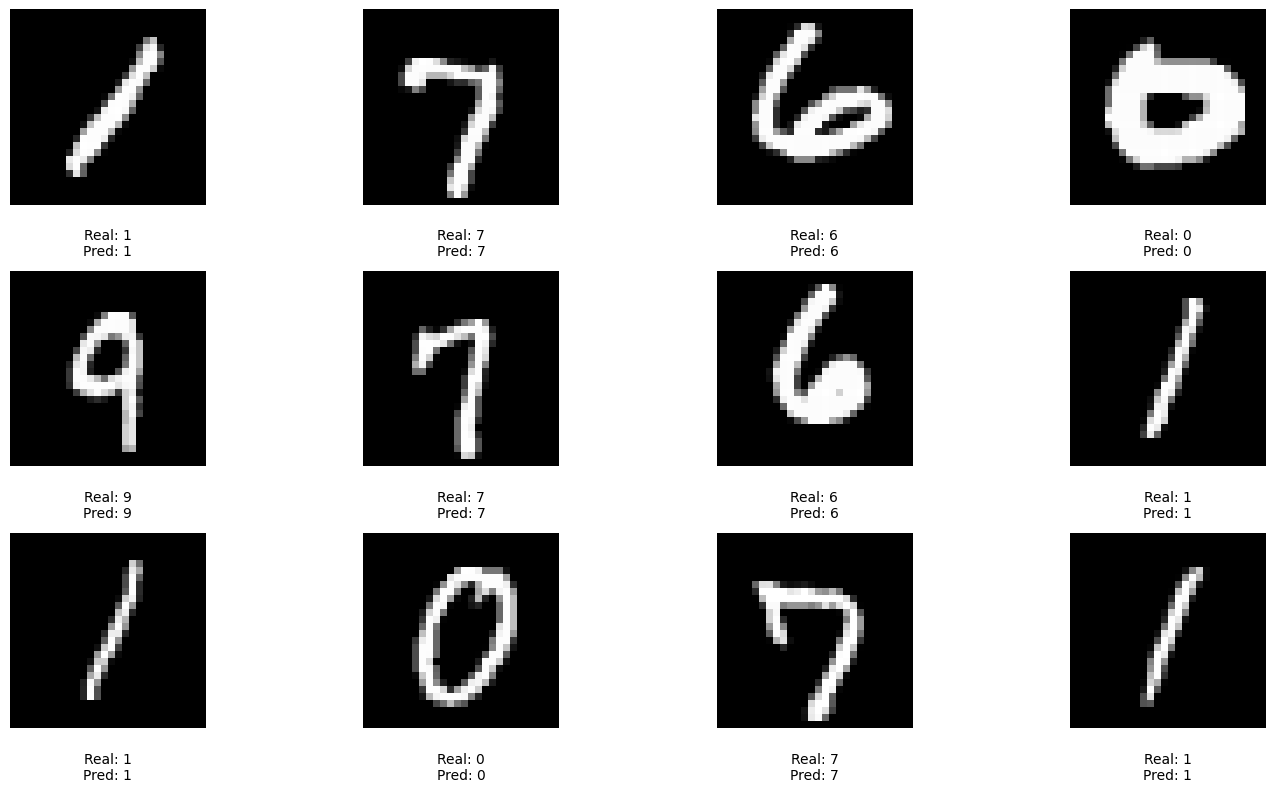

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 12
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_knn[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

#### Algunas predicciones erroneas

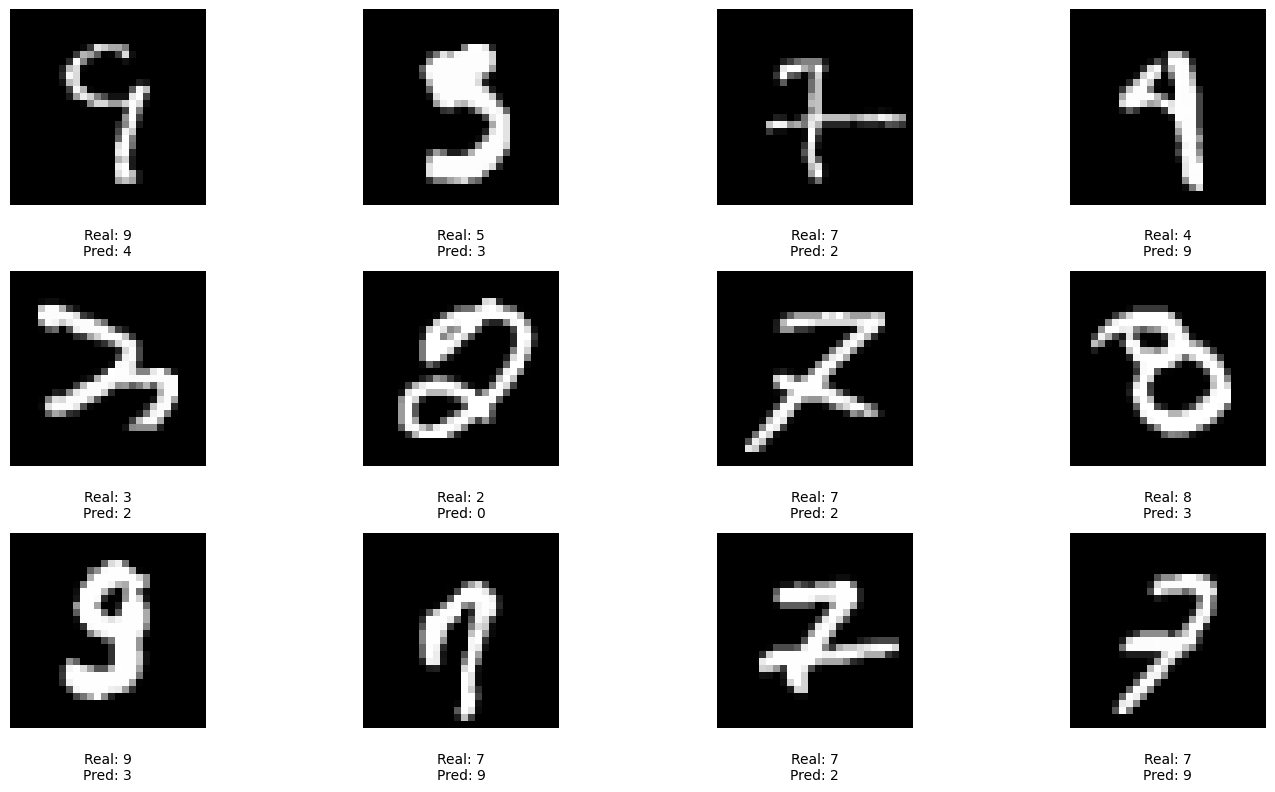

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

incorrect_indices = np.where(test_labels != predictions_svm)[0]
num_samples = 12
sample_indices = np.random.choice(incorrect_indices, min(num_samples, len(incorrect_indices)), replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    image = test_images[idx].reshape(28, 28)
    label = test_labels[idx]
    prediction = predictions_svm[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axis('off')

plt.tight_layout()
plt.show()

## **Comparación de Resultados y Decisión**

### Una vez terminada toda la construcción y evaluación de los modelos, podemos empezar a comparar los resultados y decidir cuál es el que vamos a escoger para usar en nuestra aplicación interactiva.

### **Analisis de resultados**

#### Vamos a mostrar una comparación entre los tres modelos, revisando sus matrices de confusión y métricas importantes para decidir cuál será el modelo a usar en nuestra aplicación.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Precision
accuracy_lr = accuracy_score(test_labels, predictions_lr)
accuracy_knn = accuracy_score(test_labels, predictions_knn)
accuracy_svm = accuracy_score(test_labels, predictions_svm)

def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    return {
        'Modelo': model_name,
        'Accuracy': f"{accuracy * 100:.2f}%",
        'F1-Score': f"{f1:.4f}",
        'Recall': f"{recall:.4f}",
        'Matriz de Confusión': cm
    }

# Metricas para los tres modelos llamando a la funcion de arriba
metrics_lr = calculate_metrics(test_labels, predictions_lr, 'Regresión Logística')
metrics_knn = calculate_metrics(test_labels, predictions_knn, 'KNN')
metrics_svm = calculate_metrics(test_labels, predictions_svm, 'SVM')

# Crear la figura
fig = plt.figure(figsize=(18, 10))  # Tamaño de la figura
gs = gridspec.GridSpec(2, 3, height_ratios=[3, 1], wspace=0.5, hspace=0.5)  # 2 filas, 3 columnas

# Matrices de confusion
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": 10})
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Predicción', fontsize=10)
    ax.set_ylabel('Valor Real', fontsize=10)

# Cuadro de las metricas
def plot_metrics(ax, metrics, title):
    ax.axis('off')  # Ocultar ejes
    table_data = [
        ["Accuracy", metrics['Accuracy']],
        ["F1-Score", metrics['F1-Score']],
        ["Recall", metrics['Recall']]
    ]
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.4, 0.4])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax.set_title(title, fontsize=12)

# Graficar las matrices de confusión
ax1 = plt.subplot(gs[0, 0])
plot_confusion_matrix(ax1, metrics_lr['Matriz de Confusión'], "Regresión Logística")

ax2 = plt.subplot(gs[0, 1])
plot_confusion_matrix(ax2, metrics_knn['Matriz de Confusión'], "KNN")

ax3 = plt.subplot(gs[0, 2])
plot_confusion_matrix(ax3, metrics_svm['Matriz de Confusión'], "SVM")

# Graficar las métricas
ax4 = plt.subplot(gs[1, 0])
plot_metrics(ax4, metrics_lr, "Métricas - Regresión Logística")

ax5 = plt.subplot(gs[1, 1])
plot_metrics(ax5, metrics_knn, "Métricas - KNN")

ax6 = plt.subplot(gs[1, 2])
plot_metrics(ax6, metrics_svm, "Métricas - SVM")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.5)
plt.show()

NameError: name 'predictions_lr' is not defined

#### Vamos a analizar punto por punto esta comparación de resultados:

#####  **Análisis de Precisión (Accuracy):** La Regresión Logística es la menos precisa de las tres, con un 92.55% de aciertos. Aunque es un modelo relativamente simple, tiene dificultades con algunos dígitos más complejos, lo que se refleja en los errores de la matriz de confusión. KNN y SVM tienen una precisión muy similar, con SVM siendo ligeramente superior con un 97.92%, lo que lo convierte en el mejor modelo en términos de clasificación correcta de los dígitos.

##### **Análisis de F1-Score y Recall**: Aquí vemos la misma tendencia que con la precisión: SVM tiene los mejores valores, seguido muy de cerca por KNN. La Regresión Logística queda rezagada, lo que indica que no solo tiene menor precisión, sino que también pierde más instancias correctas.

##### **Análisis de la Matriz de Confusión**: La Regresión Logística tiene más confusiones entre los números, en especial en dígitos como el 3, 5 y 8, que a veces son mal clasificados.KNN mejora considerablemente y tiene menos errores de clasificación en comparación con la Regresión Logística. Sin embargo, sigue presentando algunas confusiones con dígitos similares como 4 y 9. SVM tiene la matriz de confusión más limpia, con la mayoría de los valores concentrados en la diagonal principal. Los errores son mínimos y se presentan en muy pocos casos.

##### **Análisis de las Curvas ROC y AUC**: Aunque no están dispuestas al final las tres curvas, si analizamos cada una, podemos darnos cuenta fácilmente de que el SVM no solo tiene las mejores curvas ROC, sino también el mejor AUC, tanto por clase individual como en promedio. Esto nos muestra que el SVM es superior en este aspecto comparado con los otros dos modelos.

##### Vemos entonces que, según el análisis que hicimos de las métricas, el mejor es KNN. Sin embargo, también hay que tener en cuenta el factor de tiempo de entrenamiento y prueba de los modelos. Dado que el KNN y el SVM tienen métricas similares, tomaremos ambos y analizaremos el tiempo mencionado para tomar la decisión.

##### **Velocidad de Entrenamiento:** KNN es más rápido de entrenar porque simplemente almacena los datos sin necesidad de optimizar una función de decisión. SVM con kernel RBF es mucho más lento, ya que necesita calcular una transformación en un espacio de alta dimensión y optimizar los vectores de soporte.

##### **Velocidad de Predicción**: Aquí es donde SVM tiene ventaja sobre KNN, ya que KNN es lento en la predicción porque, para cada nueva imagen, debe calcular la distancia con todos los datos de entrenamiento. Esto se vuelve un problema si queremos hacer predicciones en tiempo real. SVM, en cambio, es más rápido en la fase de predicción, ya que solo evalúa una función matemática predefinida.

### **Toma de desiciones**

#### Para la aplicación que se va a desarrollar, es fundamental elegir un modelo que no solo tenga buenas métricas de precisión, sino que también sea eficiente en la predicción en tiempo real. En este caso, aunque el KNN tiene la ventaja de ser más rápido en el proceso de entrenamiento, su método de predicción es considerablemente más lento, ya que requiere comparar cada nueva imagen con todos los datos de entrenamiento. Esto genera un tiempo de respuesta elevado, lo cual puede afectar negativamente la experiencia del usuario cuando la aplicación esté en funcionamiento.

#### Por otro lado, el SVM ha demostrado tener métricas ligeramente superiores en precisión, recall y F1-score en comparación con KNN, lo que significa que es capaz de clasificar las imágenes con un mayor nivel de exactitud. Aunque su entrenamiento es más costoso en términos de tiempo, este es un inconveniente que se afronta solo una vez al generar el modelo, mientras que la predicción, que es lo que realmente impacta en la velocidad de respuesta de la aplicación, es mucho más rápida en SVM que en KNN.

#### Dado que la aplicación requerirá hacer predicciones en tiempo real, es crucial que el modelo seleccionado pueda procesar rápidamente las imágenes sin generar retrasos. En este sentido, SVM ofrece un equilibrio ideal entre precisión y velocidad de predicción, asegurando que los usuarios puedan obtener resultados inmediatos al ingresar nuevas imágenes en la aplicación.

#### Por todas estas razones, **la mejor opción para este caso de uso es SVM**, ya que permite mantener una alta precisión en la clasificación sin sacrificar la eficiencia en el tiempo de respuesta, lo cual es clave para una aplicación interactiva que depende de la rapidez en la generación de resultados. El modelo seria el siguiente:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from keras.datasets import mnist

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos

# Vectores de 784 características
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Valores al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Entrenar
svm = SVC(kernel='rbf', probability=True, random_state = semilla) # Vamos a usar rbf en este caso y colocamos probability=True para despues poder ver sus curvas ROC
svm.fit(train_images, train_labels)

predictions_svm = svm.predict(test_images)
accuracy = accuracy_score(test_labels, predictions_svm)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de prueba: 97.92%


#### Guardando el modelo

In [ ]:
import joblib

# Guardamos el modelo en un archivo .pkl
joblib.dump(svm, 'svm_mnist.joblib')

['svm_mnist.joblib']

#### Descargando el Modelo

In [ ]:
from google.colab import files

# Descargamos el archivo .pkl
files.download('svm_mnist.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>